(0.15, 0.65)

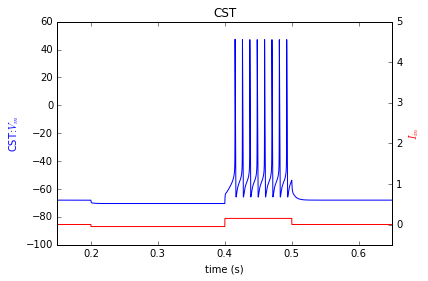

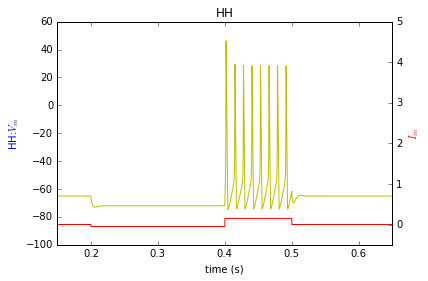

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def hh(I, dt):
    ##########################################################################
    # Simulate the membrane potential of a Hodgkin Huxley neuron with 
    #   a given input current
    # Input:
    #    I = current in uA/mm^2a
    #    dt = time step between I measurments [ms]
    #
    # Output:
    #    Vm = membrane voltage in mV
    #    n = sodium activation
    #    m = potassium activation
    #    h = 1 - potassium inactivation
    
    # This function simulates a dynamical system with state variables
    #    DV = 1/C (I - Ik - Ina - Il)
    #    Il = gl(V-El)
    #    Ik = gk*n^4(V-Ek)
    #    Ina = gna*m^3*h(V-Ena)
    #    Dn = (ninf(V) - n)/taun(V) (same for m, h )

    # Summary of units: I = uA / mm^2; V = mV; g = mS; g*V = uA; C = uF; uA/uC*ms = mV

    ##########################################################################
    # Constants:
    # Reversal potentials for various ions
    Ek = -77 #[mV]
    Ena = 50 #[mV]
    El = -54.402 #[mV]

    # Membrane capacitance: 
    C = 0.01 #[uF/mm^2]
    
    # Maximum conductances [mS/mm^2]
    gna = 1.2
    gk = 0.36
    gl = 0.003

    ##########################################################################
    # Gating variables:
    # activation K [n]
    alpha_n = lambda V: 0.01*(V + 55) / (1 - np.exp(-0.1*(V + 55)))
    beta_n = lambda V: 0.125 * np.exp(-0.0125*(V + 65))
    tau_n = lambda V: 1 /(alpha_n(V) + beta_n(V))
    n_inf = lambda V: alpha_n(V) * tau_n(V)
    # activation Na [m]
    alpha_m = lambda V: 0.1*(V + 40) / (1 - np.exp(-0.1*(V + 40)))
    beta_m = lambda V: 4 * np.exp(-0.0556*(V + 65))
    tau_m = lambda V: 1/(alpha_m(V) + beta_m(V))
    m_inf = lambda V: alpha_m(V) * tau_m(V)
    # inactivation Na [h]
    alpha_h = lambda V: 0.07*np.exp(-0.05*(V + 65))
    beta_h = lambda V:  1 /(1 + np.exp(-0.1*(V + 35)))
    tau_h = lambda V: 1/(alpha_h(V) + beta_h(V))
    h_inf = lambda V: alpha_h(V) * tau_h(V);
    
    # Initializations
    n = np.zeros(len(I)); m = np.zeros(len(I)); h = np.zeros(len(I)); V = np.zeros(len(I))
 
    # Set initial conditions:
    Vstart = -65 #[mV] (starting membrane potential) 
    V[0] = Vstart #[mV]
    n[0] = n_inf(Vstart); m[0] = m_inf(Vstart); h[0] = h_inf(Vstart);
    
    ##########################################################################
    # Simulation: iteratatively update the variables using the forward Euler method
    for ii in range(len(I)-1):
        # Update activation state variables
        n[ii+1] = n[ii] + dt*(n_inf(V[ii]) - n[ii])/tau_n(V[ii])
        m[ii+1] = m[ii] + dt*(m_inf(V[ii]) - m[ii])/tau_m(V[ii])
        h[ii+1] = h[ii] + dt*(h_inf(V[ii]) - h[ii])/tau_h(V[ii])
        V[ii+1] = V[ii] + dt/C*(I[ii] - gl*(V[ii]-El) - gk*n[ii]**4 *(V[ii]-Ek) - gna*m[ii]**3*h[ii]*(V[ii]-Ena));

    return V, m, n, h

def CST(I, dt):
    ##########################################################################
    # Simulate the membrane potential of a CST neuron with 
    #   a given input current
    # Input:
    #    I = current in uA/mm^2a
    #    dt = time step between I measurments [ms]
    #
    # Output:
    #    Vm = membrane voltage in mV
    #    n = sodium activation
    #    m = potassium activation
    #    h = 1 - potassium inactivation
    
    # This function simulates a dynamical system with state variables
    #    DV = 1/C (I - Ik - Ina - Il)
    #    Il = gl(V-El)
    #    Ik = gk*n^4(V-Ek)
    #    Ina = gna*m^3*h(V-Ena)
    #    IA=gA*a^3*b(V-EA)
    #    Dn = (ninf(V) - n)/taun(V) (same for m, h,a,b )

    # Summary of units: I = uA / mm^2; V = mV; g = mS; g*V = uA; C = uF; uA/uC*ms = mV

    ##########################################################################
    # Constants:
    # Reversal potentials for various ions
    Ek = -72 #[mV]
    Ena = 55 #[mV]
    El = -17 #[mV]
    EA = -75 #[mV] 
    
    # Membrane capacitance: 
    C = 0.01 #[uF/mm^2]
    
    # Maximum conductances [mS/mm^2]
    gna = 1.2
    gk = 0.2
    gl = 0.003
    gA = 0.477
    
    ##########################################################################
    # Gating variables:
    # activation K [n]
    alpha_n = lambda V: 0.02*(V + 45.7) / (1 - np.exp(-0.1*(V + 45.7)))
    beta_n = lambda V: 0.25 * np.exp(-0.0125*(V + 55.7))
    tau_n = lambda V: 1 /(alpha_n(V) + beta_n(V))
    n_inf = lambda V: alpha_n(V) * tau_n(V)
    # activation Na [m]
    alpha_m = lambda V: 0.38*(V + 29.7) / (1 - np.exp(-0.1*(V + 29.7)))
    beta_m = lambda V: 15.2* np.exp(-0.0556*(V + 54.7))
    tau_m = lambda V: 1/(alpha_m(V) + beta_m(V))
    m_inf = lambda V: alpha_m(V) * tau_m(V)
    # inactivation Na [h]
    alpha_h = lambda V: 0.266*np.exp(-0.05*(V + 48))
    beta_h = lambda V:  3.8 /(1 + np.exp(-0.1*(V + 18)))
    tau_h = lambda V: 1/(alpha_h(V) + beta_h(V))
    h_inf = lambda V: alpha_h(V) * tau_h(V);
    # activation A [a,b]
    a_inf= lambda V: ((0.0761*np.exp(0.0314*(V+94.22)))/(1+np.exp(0.0346*(V+1.17))))**(1/3)
    tau_a=lambda V: 0.3632+(1.158)/(1+np.exp(0.0497*(V+55.96)))
    b_inf=lambda V: (1/(1+np.exp(0.0688*(V+53.3))))**4
    tau_b=lambda V: 1.24+(2.678)/(1+np.exp(0.0624*(V+50)))
    
    # Initializations
    n = np.zeros(len(I)); m = np.zeros(len(I)); h = np.zeros(len(I));
    a = np.zeros(len(I)); b = np.zeros(len(I));
    V = np.zeros(len(I))
 
    # Set initial conditions:
    Vstart = -68 #[mV] (starting membrane potential) 
    V[0] = Vstart #[mV]
    n[0] = n_inf(Vstart); m[0] = m_inf(Vstart); h[0] = h_inf(Vstart);
    a[0] = a_inf(Vstart); b[0] = b_inf(Vstart);
    ##########################################################################
    # Simulation: iteratatively update the variables using the forward Euler method
    for ii in range(len(I)-1):
        # Update activation state variables
        n[ii+1] = n[ii] + dt*(n_inf(V[ii]) - n[ii])/tau_n(V[ii])
        m[ii+1] = m[ii] + dt*(m_inf(V[ii]) - m[ii])/tau_m(V[ii])
        h[ii+1] = h[ii] + dt*(h_inf(V[ii]) - h[ii])/tau_h(V[ii])
        a[ii+1] = a[ii] + dt*(a_inf(V[ii]) - a[ii])/tau_a(V[ii])
        b[ii+1] = b[ii] + dt*(b_inf(V[ii]) - b[ii])/tau_b(V[ii])
        V[ii+1] = V[ii] + dt/C*(I[ii] - gl*(V[ii]-El) - gk*n[ii]**4 *(V[ii]-Ek) - gna*m[ii]**3*h[ii]*(V[ii]-Ena) - gA*a[ii]**3*b[ii]*(V[ii]-EA));

    return V, m, n, h, a, b

dt=0.01
I=np.zeros(int(1000/dt))
I[int(200/dt):int(400/dt)]=-0.05
I[int(400/dt):int(500/dt)]=0.15
V,m,m,h,a,b=CST(I,dt)
V1=V
V,m,m,h,=hh(I,dt)
V2=V

%matplotlib inline
fig, ax1 = plt.subplots()
ax1.set_title('CST')
t = np.arange(0, 1, dt / 1000)
ax1.plot(t, V1, 'b-')
ax1.set_xlabel('time (s)')
ax1.set_ylabel(r'CST:$V_{m}$', color='b')
ax1.set_ylim([-100, 60])
ax2 = ax1.twinx()
ax2.plot(t, I, 'r-')
ax2.set_ylim([-0.5, 5])
ax2.set_ylabel(r'$I_{in}$', color='r')
ax1.set_xlim([0.15, 0.65])

fig, ax3=plt.subplots()
ax3.set_title('HH')
ax3.plot(t, V2, 'y-')
ax3.set_xlabel('time (s)')
ax3.set_ylabel(r'HH:$V_{m}$', color='b')
ax3.set_ylim([-100, 60])
ax4 = ax3.twinx()
ax4.plot(t, I, 'r-')
ax4.set_ylim([-0.5, 5])
ax4.set_ylabel(r'$I_{in}$', color='r')
ax3.set_xlim([0.15, 0.65])